In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

In [22]:
# 1) Load & split the dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [35]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(55000, 28, 28, 1) (55000,)
(5000, 28, 28, 1) (5000,)
(10000, 28, 28, 1) (10000,)


In [23]:
# 1) Add the channel dimension (reshape)
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test  = X_test[...,  np.newaxis]

In [24]:
# 2) Convert to float32 and scale pixels to [0,1]
X_train = X_train.astype("float32") / 255.0
X_valid = X_valid.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

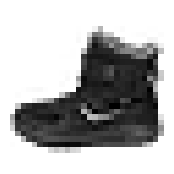

In [25]:
plt.figure(figsize=(2, 2))  # Smaller size
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [26]:
# 3) Build the CNN with Functional API
inputs = layers.Input(shape=(28, 28, 1), name="input_image")

# # Normalize inside the model
# x = layers.Rescaling(1./255, name="rescale")(inputs)
x = inputs

# Convolutional feature extractor
x = layers.Conv2D(32, (3,3), activation="relu", name="conv1")(x)
x = layers.MaxPooling2D((2,2), name="pool1")(x)
x = layers.Conv2D(64, (3,3), activation="relu", name="conv2")(x)
x = layers.MaxPooling2D((2,2), name="pool2")(x)
x = layers.Conv2D(64, (3,3), activation="relu", name="conv3")(x)

# Classification head
x = layers.Flatten(name="flatten")(x)
x = layers.Dense(64, activation="relu", name="dense1")(x)
x = layers.Dropout(0.5, name="dropout")(x)
outputs = layers.Dense(10, activation="softmax", name="output_probs")(x)

model = Model(inputs, outputs, name="fashion_mnist_cnn")



In [27]:
# 4) Compile
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "fashion_mnist_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 pool1 (MaxPooling2D)        (None, 13, 13, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 5, 5, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)         

In [28]:
# 5) Train
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6874 - accuracy: 0.7508 - val_loss: 0.3961 - val_accuracy: 0.8520
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4439 - accuracy: 0.8446 - val_loss: 0.3418 - val_accuracy: 0.8702
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3713 - accuracy: 0.8698 - val_loss: 0.3099 - val_accuracy: 0.8876
Epoch 4/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3308 - accuracy: 0.8835 - val_loss: 0.2832 - val_accuracy: 0.8992
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3000 - accuracy: 0.8930 - val_loss: 0.2663 - val_accuracy: 0.9028
Epoch 6/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2786 - accuracy: 0.9005 - val_loss: 0.2535 - val_accuracy: 0.9064
Epoch 7/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2614 - accuracy: 0.9076 - val_loss: 0.2519 - val

In [29]:
# 6) Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.9019

Test accuracy: 0.9019


In [30]:
# 7) Predict on a few samples
sample_images = X_test[:5]
sample_labels = y_test[:5]
pred_probs = model.predict(sample_images)
print(pred_probs.round(2))
pred_labels = np.argmax(pred_probs, axis=1)

for i, (pred, true) in enumerate(zip(pred_labels, sample_labels)):
    print(f"Sample {i}: Predicted={pred}, True={true}")

1/1 [==============================] - 0s 79ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.01 0.   0.01 0.   0.93 0.   0.   0.  ]]
Sample 0: Predicted=9, True=9
Sample 1: Predicted=2, True=2
Sample 2: Predicted=1, True=1
Sample 3: Predicted=1, True=1
Sample 4: Predicted=6, True=6


In [31]:
y_pred = pred_probs.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [34]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)